In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import missingno as msno
import plotly.express as px
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('heart.csv')

In [ ]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [ ]:
df.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [ ]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
for x in df.cp.unique():
  print(x)

3
2
1
0


# About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 1= less chance of heart attack 0= more chance of heart attack

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [ ]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    float64
 12  thall     302 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 43.5 KB


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [5]:
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
df[df.caa == 4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [6]:
df.loc[df.caa == 4, 'caa'] = np.NaN

In [7]:
df.caa.value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
Name: caa, dtype: int64

In [ ]:
df.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [ ]:
df[df.thall == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [8]:
df.loc[df.thall == 0, 'thall'] = np.NaN
df.thall.value_counts()

2.0    166
3.0    117
1.0     18
Name: thall, dtype: int64

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         5
thall       2
output      0
dtype: int64

In [10]:
df = df.fillna(df.median())

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
duplicated = df.duplicated().sum()

In [ ]:
duplicated

1

In [ ]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [ ]:
duplicated = df[df.duplicated()]
duplicated

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [12]:
df = df[~df.duplicated()]

In [ ]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0


In [ ]:
type(df.oldpeak[0])

False

In [ ]:
print(type(df.oldpeak[0]))

<class 'numpy.float64'>


In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
df.age.median()

55.5

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trtbps      AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalachh          AxesSubplot(0.125,0.125;0.0945122x0.343182)
exng           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slp            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
caa            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thall          AxesSubplot(0.692073,0.125;0.0945122x0.343182)
output         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

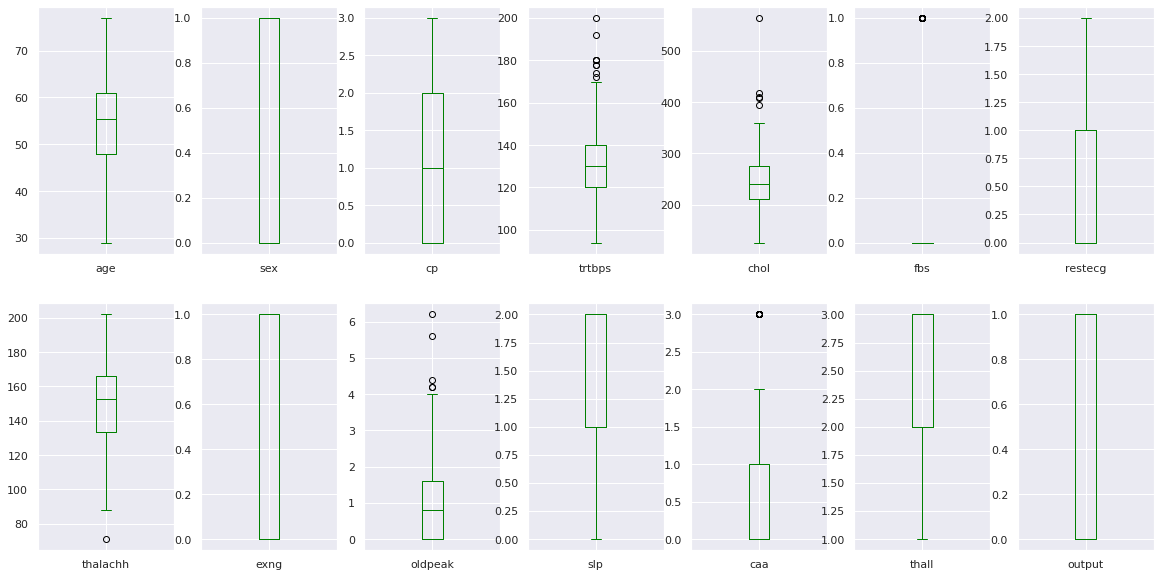

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20,10), color='green')

In [ ]:
df.caa.value_counts()

0.0    179
1.0     65
2.0     38
3.0     20
Name: caa, dtype: int64

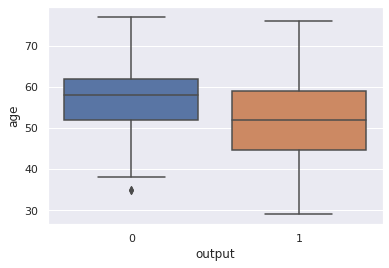

In [ ]:
sns.boxplot(x='output', y='age',data=df)

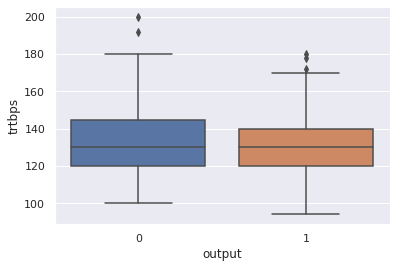

In [ ]:
sns.boxplot(x='output', y='trtbps',data=df)

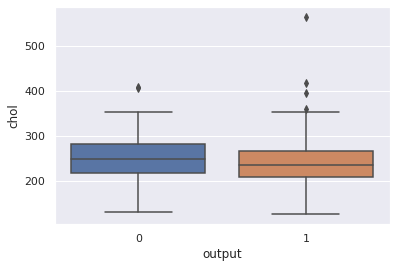

In [ ]:
sns.boxplot(x='output', y='chol',data=df)

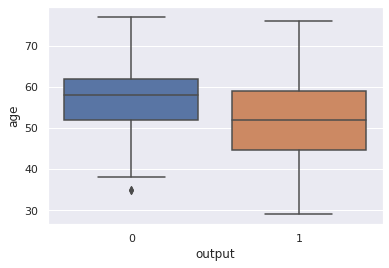

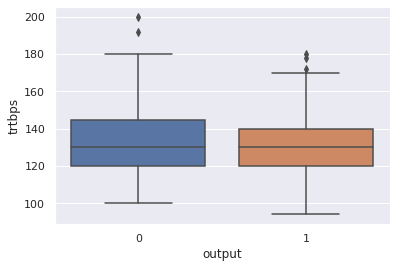

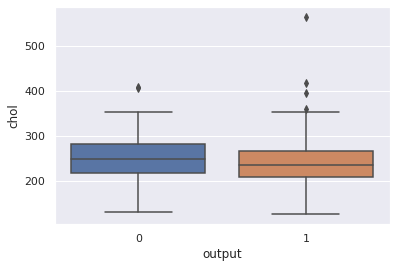

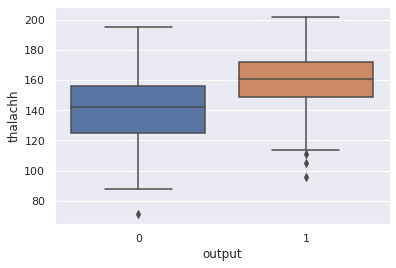

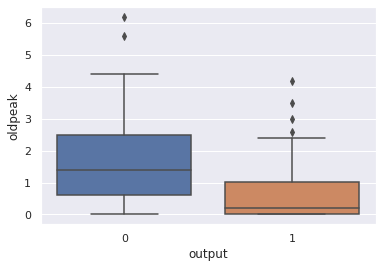

In [ ]:
for col in df.columns:
  if df[col].max() > 3:
    sns.boxplot(x='output', y=col,data=df)
    plt.show()



In [14]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
print(q1,q3)

age          48.00
sex           0.00
cp            0.00
trtbps      120.00
chol        211.00
fbs           0.00
restecg       0.00
thalachh    133.25
exng          0.00
oldpeak       0.00
slp           1.00
caa           0.00
thall         2.00
output        0.00
Name: 0.25, dtype: float64 age          61.00
sex           1.00
cp            2.00
trtbps      140.00
chol        274.75
fbs           0.00
restecg       1.00
thalachh    166.00
exng          1.00
oldpeak       1.60
slp           2.00
caa           1.00
thall         3.00
output        1.00
Name: 0.75, dtype: float64


In [15]:
IQR = q3.trtbps-q1.trtbps

df.loc[((df.trtbps<( q1.trtbps - 1.5*IQR)) | (df.trtbps > (q3.trtbps + 1.5 * IQR))) ,'trtbps'] = np.NaN

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trtbps      AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalachh          AxesSubplot(0.125,0.125;0.0945122x0.343182)
exng           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slp            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
caa            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thall          AxesSubplot(0.692073,0.125;0.0945122x0.343182)
output         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

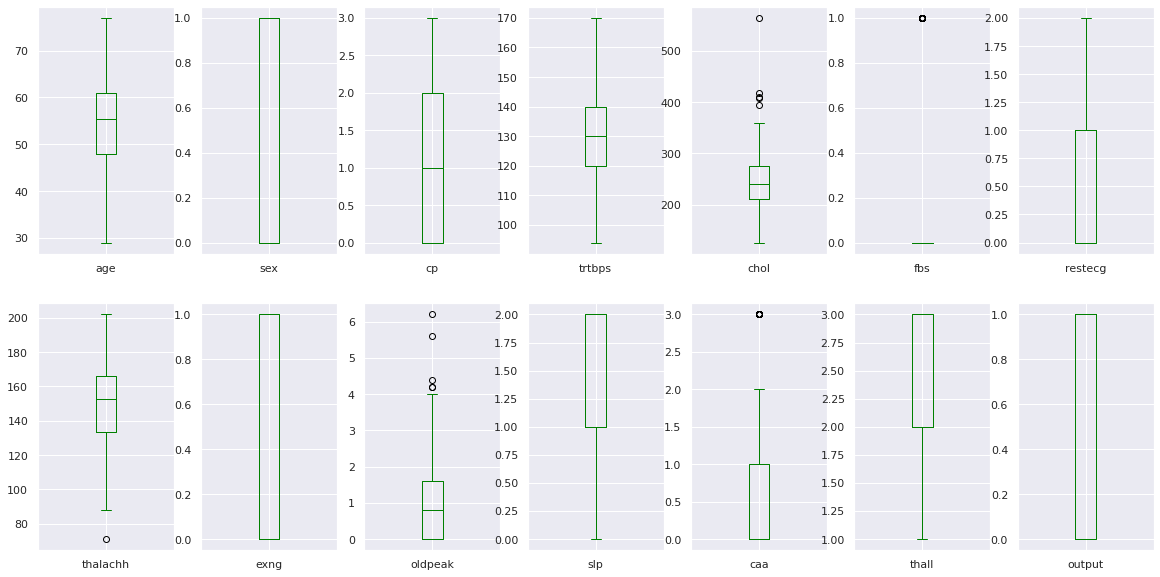

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20,10), color='green')

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      9
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [16]:
IQR = q3.chol-q1.chol

df.loc[((df.chol<( q1.chol - 1.5*IQR)) | (df.chol > (q3.chol + 1.5 * IQR))) ,'chol'] = np.NaN

IQR = q3.oldpeak-q1.oldpeak

df.loc[((df.oldpeak<( q1.oldpeak - 1.5*IQR)) | (df.oldpeak > (q3.oldpeak + 1.5 * IQR))) ,'oldpeak'] = np.NaN

df.fillna(df.median(), inplace=True)


In [17]:
IQR = q3.caa-q1.caa

df.loc[((df.caa<( q1.caa - 1.5*IQR)) | (df.caa > (q3.caa + 1.5 * IQR))) ,'caa'] = np.NaN

df.fillna(df.median(), inplace=True)

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trtbps      AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalachh          AxesSubplot(0.125,0.125;0.0945122x0.343182)
exng           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slp            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
caa            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thall          AxesSubplot(0.692073,0.125;0.0945122x0.343182)
output         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

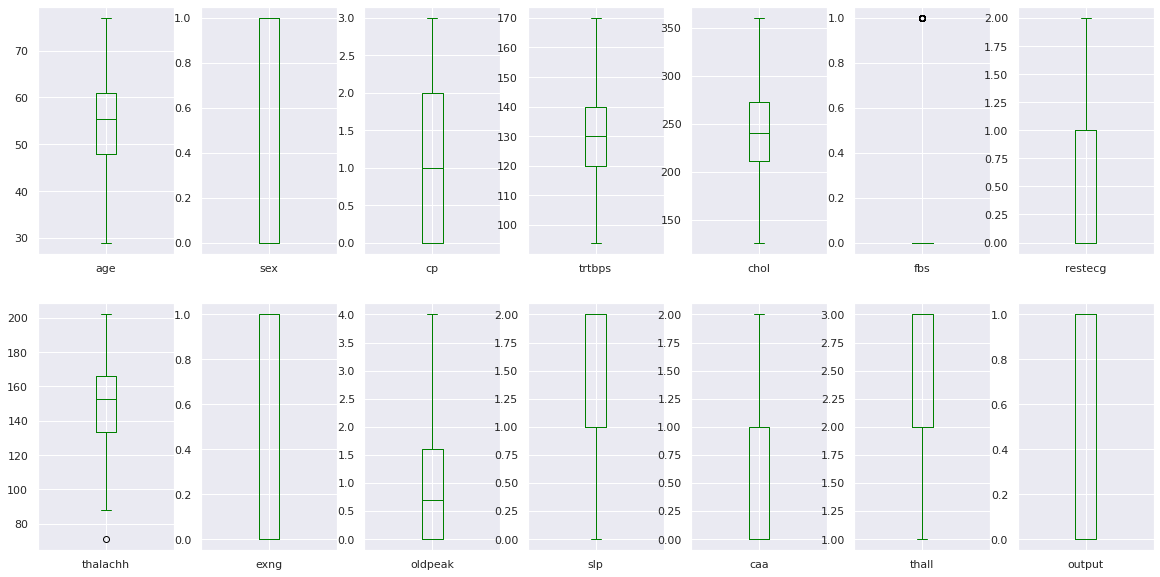

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20,10), color='green')

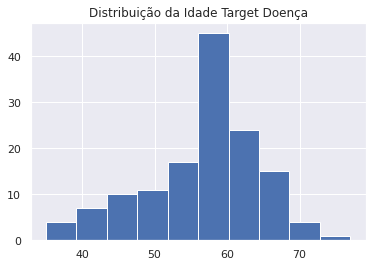

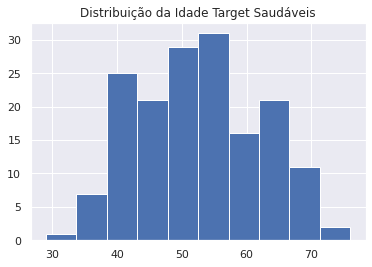

In [ ]:
df[df.output == 0].age.hist().plot(kind='bar')
plt.title("Distribuição da Idade Target Doença")
plt.show()
df[df.output == 1].age.hist().plot(kind='bar')
plt.title("Distribuição da Idade Target Saudáveis")
plt.show()

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.066225,243.218543,0.149007,0.526490,149.569536,0.327815,0.973179,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,15.148509,44.623399,0.356686,0.526027,22.903527,0.470196,1.041646,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


# About this dataset
age (Age in years)
sex : (1 = male, 0 = female)
cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
trestbps (Resting Blood Pressure in mm/hg )
chol (Serum Cholesterol in mg/dl)
fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
thalach (maximum heart rate achieved)
exang (Exercise Induced Angina): [1 = yes, 0 = no]
oldpeak (ST depression induced by exercise relative to rest)
slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
ca [number of major vessels (0–3)
thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
target: [0 = disease, 1 = no disease]

In [ ]:
df.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

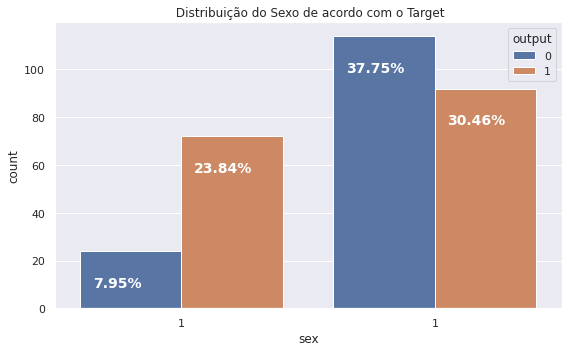

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

name = df['sex']

ax = sns.countplot(x='sex', hue='output', data=df)
ax.set_title(" Distribuição do Sexo de acordo com o Target")
ax.set_xticklabels(name, rotation = 0)

total = []

for i in ax.patches:
  total.append(i.get_height())
tota = sum(total)
for i in ax.patches:
  ax.text(i.get_x()+0.05, i.get_height()-15,
          str(round((i.get_height()/tota)*100, 2))+'%', fontsize=14,
          color = 'white',weight = 'bold')

plt.tight_layout()

In [19]:
fig = px.bar(df, x='sex', y='age', color='output', barmode='group' )
fig.show()

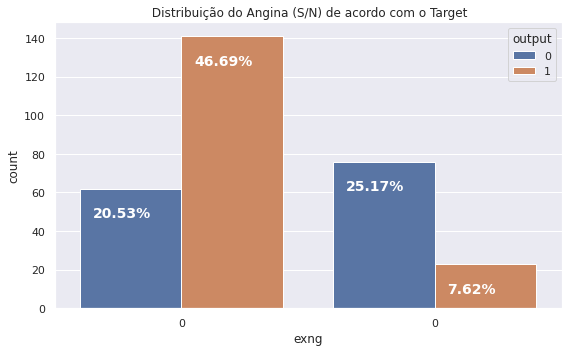

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

name = df['exng']

ax = sns.countplot(x='exng', hue='output', data=df)
ax.set_title(" Distribuição do Angina (S/N) de acordo com o Target")
ax.set_xticklabels(name, rotation = 0)

total = []

for i in ax.patches:
  total.append(i.get_height())
tota = sum(total)
for i in ax.patches:
  ax.text(i.get_x()+0.05, i.get_height()-15,
          str(round((i.get_height()/tota)*100, 2))+'%', fontsize=14,
          color = 'white',weight = 'bold')

plt.tight_layout()

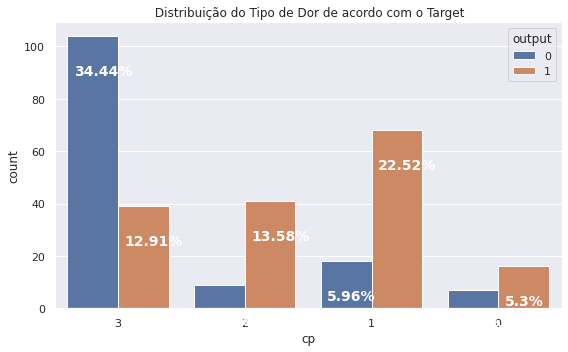

In [ ]:
fig1, ax = plt.subplots(figsize=(8,5))

name = df['cp'].unique()

ax = sns.countplot(x='cp', hue='output', data=df)
ax.set_title(" Distribuição do Tipo de Dor de acordo com o Target")
ax.set_xticklabels(name, rotation = 0)

total = []

for i in ax.patches:
  total.append(i.get_height())
tota = sum(total)
for i in ax.patches:
  ax.text(i.get_x()+0.05, i.get_height()-15,
          str(round((i.get_height()/tota)*100, 2))+'%', fontsize=14,
          color = 'white',weight = 'bold')

plt.tight_layout()

In [ ]:
df.cp.value_counts()/len(df)*100

0    47.350993
2    28.476821
1    16.556291
3     7.615894
Name: cp, dtype: float64

In [ ]:
df.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

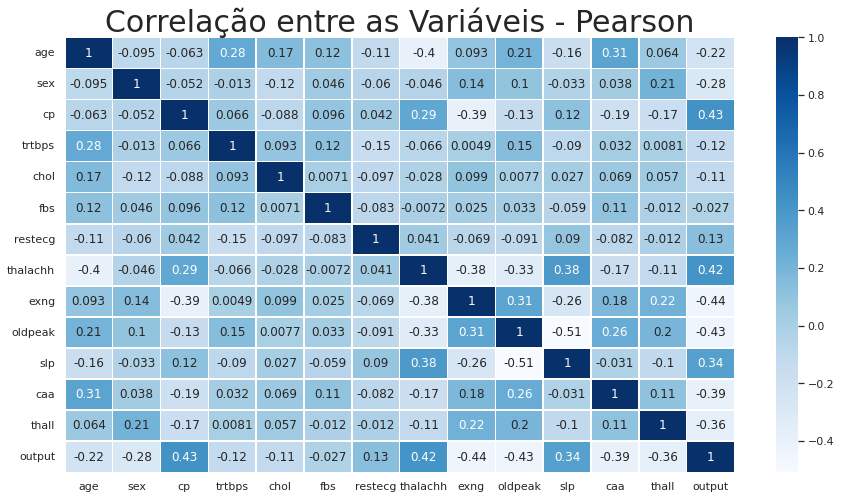

In [ ]:
sns.set(style = 'white')
plt.rcParams['figure.figsize'] = (15,8)

sns.heatmap(df.corr(method='pearson'), annot = True, linewidths = 0.5, cmap ="Blues")
plt.title('Correlação entre as Variáveis - Pearson', fontsize = 30)
plt.show()

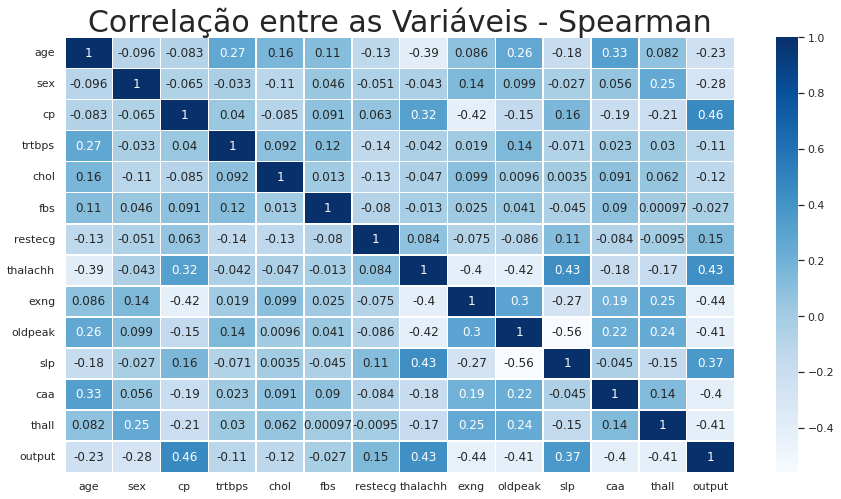

In [ ]:
sns.set(style = 'white')
plt.rcParams['figure.figsize'] = (15,8)

sns.heatmap(df.corr(method='spearman'), annot = True, linewidths = 0.5, cmap ="Blues")
plt.title('Correlação entre as Variáveis - Spearman', fontsize = 30)
plt.show()

In [ ]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0.0,2.0,1


# Troca de target.. o zero precisa ser sem doença e o 1 ser com doença e estava trocado.


In [23]:
df.output.value_counts()

1    164
0    138
Name: output, dtype: int64

In [24]:
df['output'] = (df['output'] - 1)*(-1)

In [25]:
df.output.value_counts()

0    164
1    138
Name: output, dtype: int64

In [40]:
print(y_pred)
print(y_test.T)

[1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0]
[[1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1
  0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1]]


In [38]:
cf_matrix

array([[25,  7],
       [ 5, 24]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



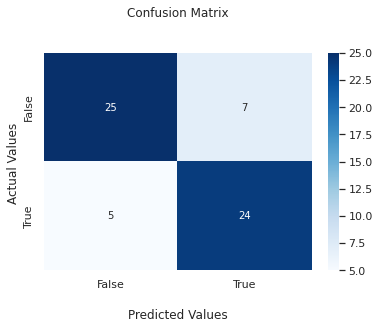

ACCURACY ==> 0.8032786885245902
Accuracy           =  0.8032786885245902
Mis_Classification =  0.19672131147540983
Sensitivity        =  0.8275862068965517
Specificity        =  0.78125
Precision          =  0.7741935483870968
F1_score           =  0.7999999999999999


In [54]:
x = df[['cp','thalachh','oldpeak','caa','thall','exng']].values
y = df[['output']].values


X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)



from xgboost import XGBClassifier

modelo1 = XGBClassifier()

modelo1.fit(X_train, y_train)

y_pred = modelo1.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test,y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

print("ACCURACY ==>",ac)
#Accuracy : - Quanto o modelo acertou no geral  

# |  TN     FP  |
# |             |
# |  FN     TP  | 

# FP => Error I
# FN => Error II

TN = cf_matrix[0][0]
TP = cf_matrix[1][1]
FN = cf_matrix[1][0]
FP = cf_matrix[0][1]

Accuracy =  (TP + TN)/(TP + TN + FN + FP)

Mis_Classification = 1 - Accuracy

Sensitivity = TP / (TP + FN)  # Recall

Specificity = TN / (TN + FP)   # Selectivity ou TNR (True Negative Rate)

Precision   = TP / (TP + FP) # Positive Predictive Value ou PPV

F1_score    = 2 * (Precision * Sensitivity)/ (Precision + Sensitivity )

print('Accuracy           = ',Accuracy)
print('Mis_Classification = ',Mis_Classification)
print('Sensitivity        = ',Sensitivity)
print('Specificity        = ',Specificity)
print('Precision          = ',Precision)
print('F1_score           = ',F1_score)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



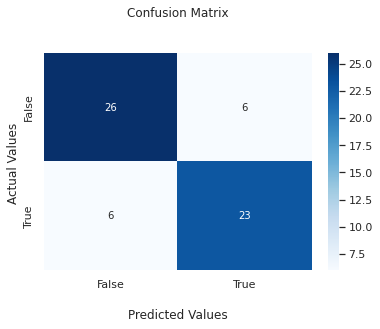

ACCURACY ==> 0.8032786885245902
Accuracy           =  0.8032786885245902
Mis_Classification =  0.19672131147540983
Sensitivity        =  0.7931034482758621
Specificity        =  0.8125
Precision          =  0.7931034482758621
F1_score           =  0.7931034482758621


In [55]:
from sklearn.ensemble import RandomForestClassifier


modelo2 = RandomForestClassifier()

modelo2.fit(X_train, y_train)

y_pred = modelo2.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test,y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

print("ACCURACY ==>",ac)
#Accuracy : - Quanto o modelo acertou no geral  

# |  TN     FP  |
# |             |
# |  FN     TP  | 

# FP => Error I
# FN => Error II

TN = cf_matrix[0][0]
TP = cf_matrix[1][1]
FN = cf_matrix[1][0]
FP = cf_matrix[0][1]

Accuracy =  (TP + TN)/(TP + TN + FN + FP)

Mis_Classification = 1 - Accuracy

Sensitivity = TP / (TP + FN)  # Recall

Specificity = TN / (TN + FP)   # Selectivity ou TNR (True Negative Rate)

Precision   = TP / (TP + FP) # Positive Predictive Value ou PPV

F1_score    = 2 * (Precision * Sensitivity)/ (Precision + Sensitivity )

print('Accuracy           = ',Accuracy)
print('Mis_Classification = ',Mis_Classification)
print('Sensitivity        = ',Sensitivity)
print('Specificity        = ',Specificity)
print('Precision          = ',Precision)
print('F1_score           = ',F1_score)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



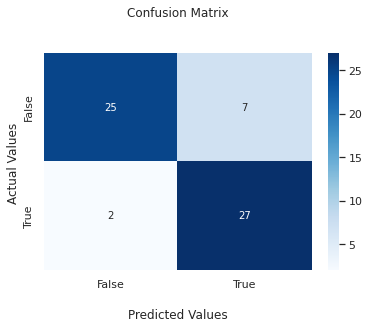

ACCURACY ==> 0.8524590163934426
Accuracy           =  0.8524590163934426
Mis_Classification =  0.14754098360655743
Sensitivity        =  0.9310344827586207
Specificity        =  0.78125
Precision          =  0.7941176470588235
F1_score           =  0.8571428571428571


In [57]:
from sklearn.naive_bayes import GaussianNB


modelo3 = GaussianNB()

modelo3.fit(X_train, y_train)

y_pred = modelo3.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test,y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

print("ACCURACY ==>",ac)
#Accuracy : - Quanto o modelo acertou no geral  

# |  TN     FP  |
# |             |
# |  FN     TP  | 

# FP => Error I
# FN => Error II

TN = cf_matrix[0][0]
TP = cf_matrix[1][1]
FN = cf_matrix[1][0]
FP = cf_matrix[0][1]

Accuracy =  (TP + TN)/(TP + TN + FN + FP)

Mis_Classification = 1 - Accuracy

Sensitivity = TP / (TP + FN)  # Recall

Specificity = TN / (TN + FP)   # Selectivity ou TNR (True Negative Rate)

Precision   = TP / (TP + FP) # Positive Predictive Value ou PPV

F1_score    = 2 * (Precision * Sensitivity)/ (Precision + Sensitivity )

print('Accuracy           = ',Accuracy)
print('Mis_Classification = ',Mis_Classification)
print('Sensitivity        = ',Sensitivity)
print('Specificity        = ',Specificity)
print('Precision          = ',Precision)
print('F1_score           = ',F1_score)


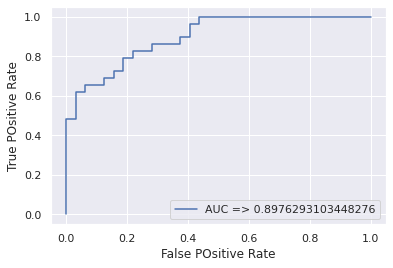

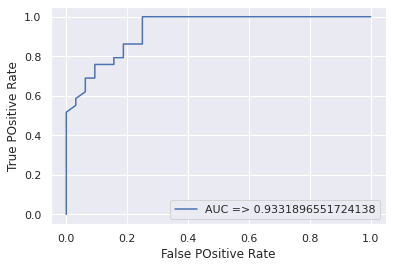

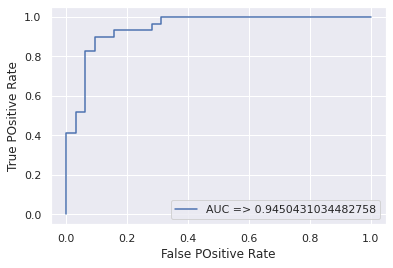

In [61]:
from sklearn import metrics

y_pred_proba = modelo1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr, label  = "AUC => " + str(auc))
plt.ylabel('True POsitive Rate')
plt.xlabel('False POsitive Rate')
plt.legend(loc=4)
plt.show()

y_pred_proba = modelo2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr, label  = "AUC => " + str(auc))
plt.ylabel('True POsitive Rate')
plt.xlabel('False POsitive Rate')
plt.legend(loc=4)
plt.show()

y_pred_proba = modelo3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr, label  = "AUC => " + str(auc))
plt.ylabel('True POsitive Rate')
plt.xlabel('False POsitive Rate')
plt.legend(loc=4)
plt.show()
